In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
#import csv file
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#removing or drop unrelated blank
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
#change data type
df['Amount']=df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#description of data in data frame
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


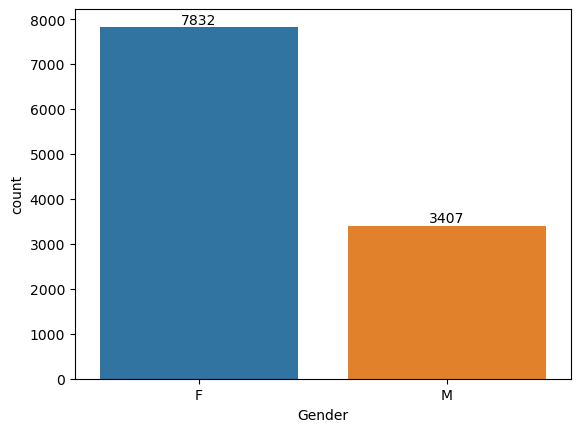

In [14]:
#Exploratory Data Analysis
#Gender

a=sns.countplot(x='Gender',data=df)
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

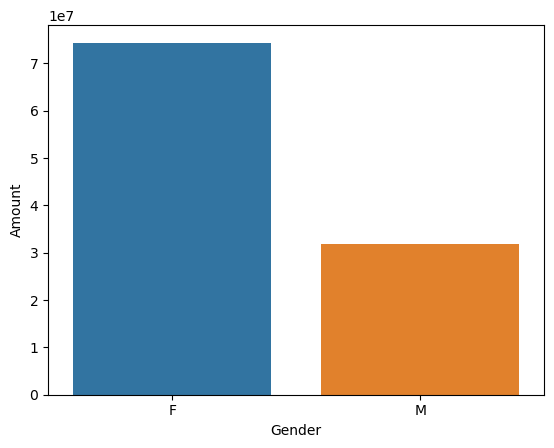

In [16]:
#we will check who spend more money male or female
spend=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(y='Amount',x='Gender',data=spend)

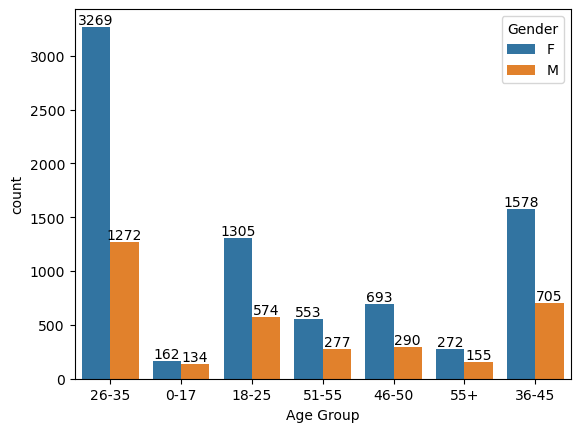

In [19]:
#Now will see with age group spend more money
a=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='State', ylabel='Orders'>

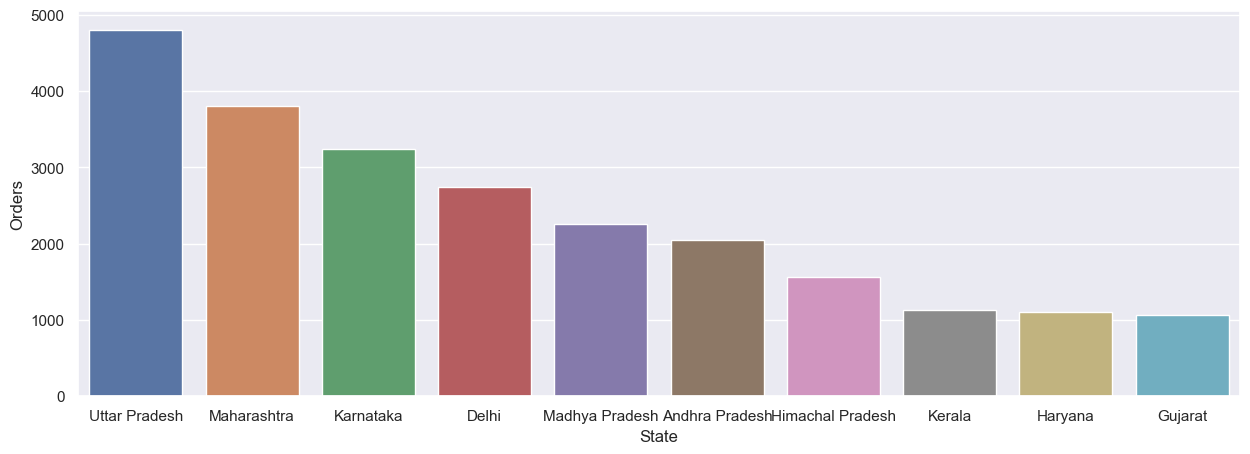

In [24]:
#With state order the most
state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=state,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

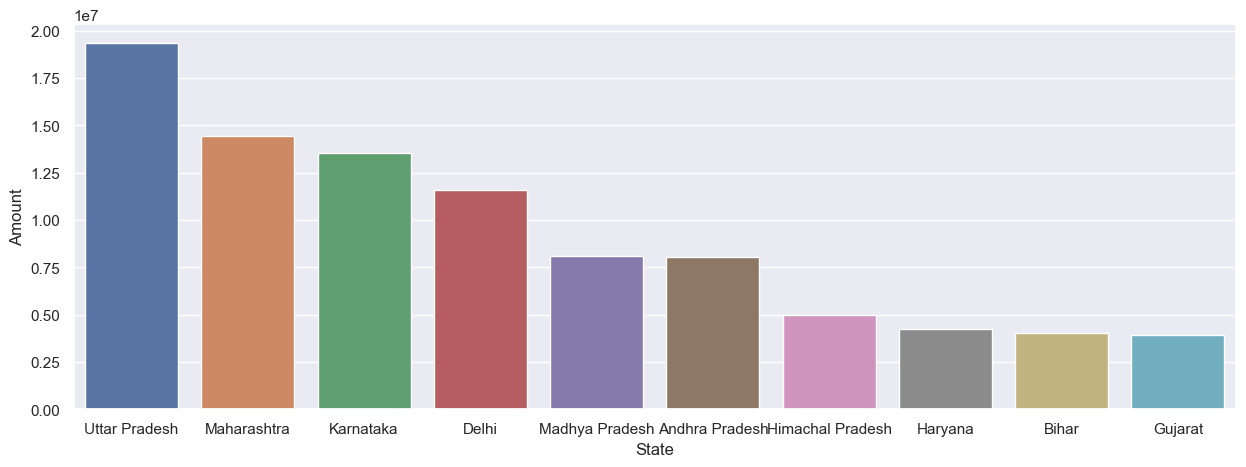

In [25]:
#total amount/sales
state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=state,x='State',y='Amount')

#we can observe 8th position most order is haryana but more money we got in bihar

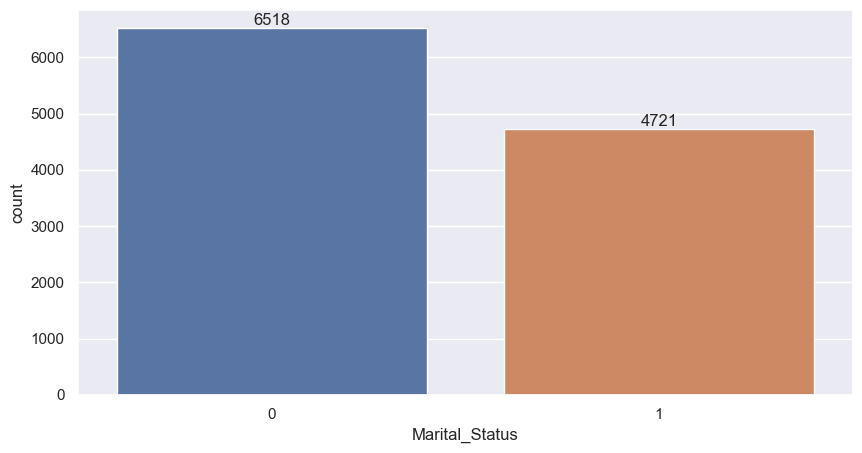

In [31]:
#Marital status
a=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(8,5)})
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

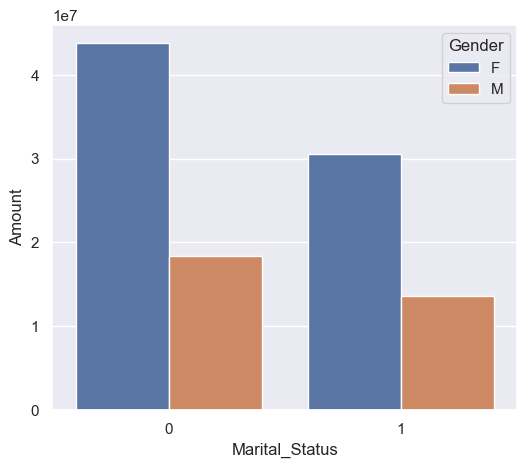

In [32]:
#Now we see in married people who buyer are more male or female
sales_state= df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state,x ='Marital_Status',y='Amount',hue='Gender')

#from below graph we can observe female buyers is more in marital status

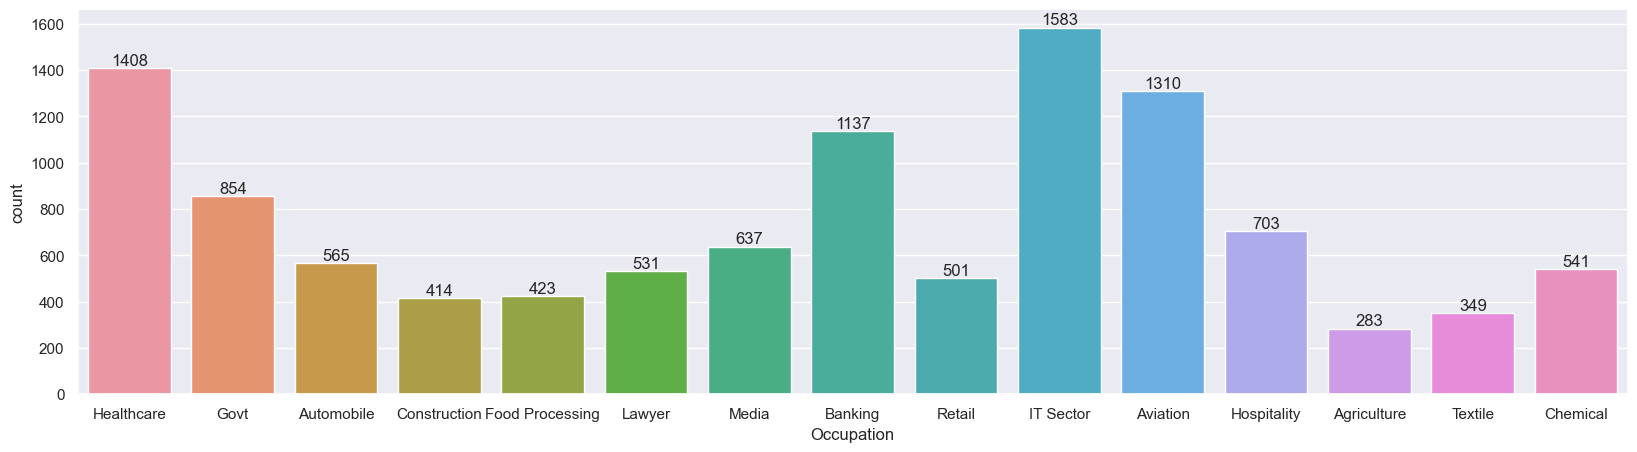

In [33]:
#occupation
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

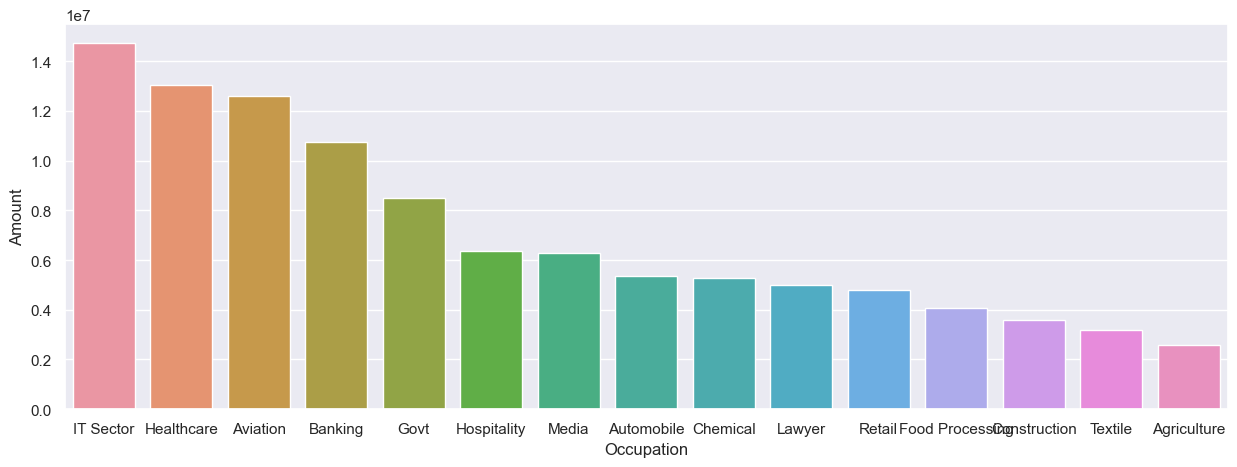

In [37]:
#Now we see with occupation spend more money
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x ='Occupation',y='Amount')

<Axes: xlabel='Product_Category', ylabel='Amount'>

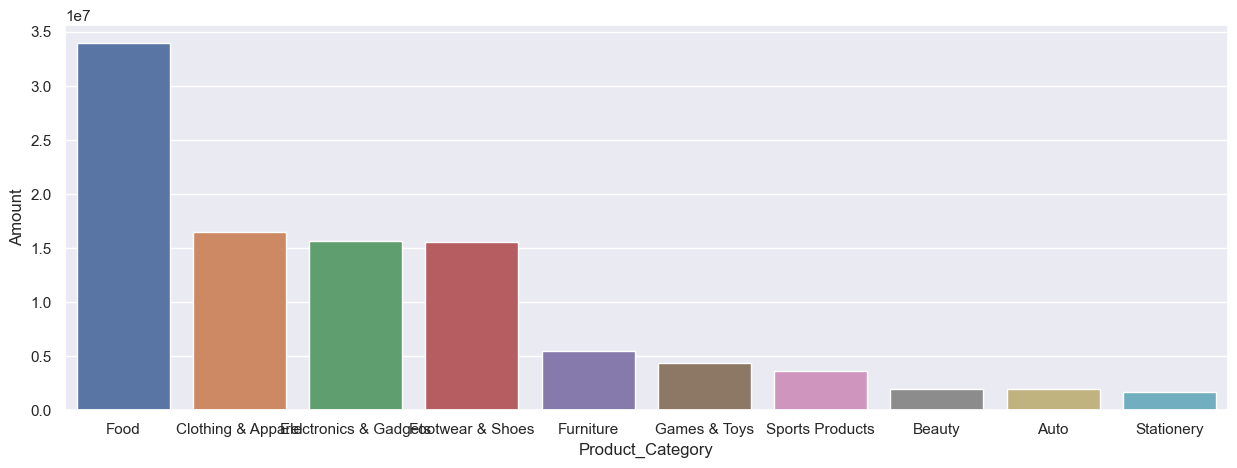

In [38]:
#Now we see with categort has sale most
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='Product_Category',y='Amount')

In [ ]:
# Conclusion
Married women age group 26-35year from UP,Maharastra and karnataka 
working in IT, Helathcare and Aviation are more likely to buy products
from  food, clothing and Electronics category